In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import wald_onoff as xmpl
from wald_train import *
from wald_plots import *
from wald_groundtruth import *

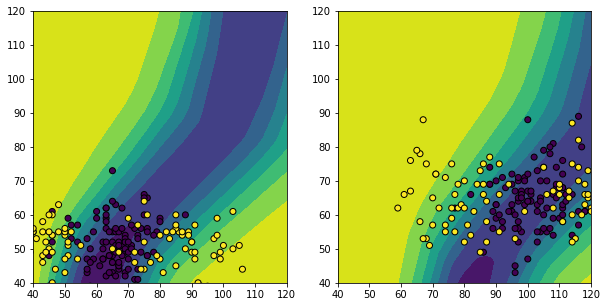

In [2]:
model = torch.load('wald_pois.ckpt')
plot_trained_model(xmpl, model,1.0,2.5)

In [3]:
calib_funcs = calibrate_model(xmpl, model, null = [1.0,1.1], alt = [2.5,0.9])
auto_rescale = auto_rescale_func(xmpl, model, null = [1.0,1.1], alt = [2.5,0.9])

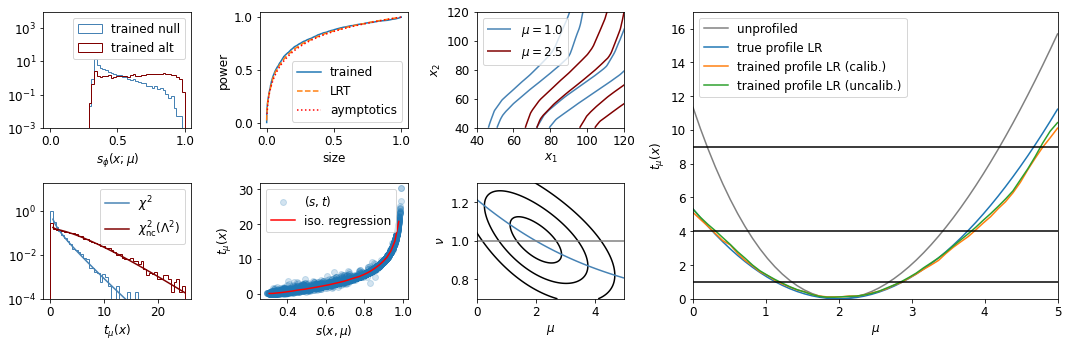

In [4]:
import matplotlib
font = {'size': 12}

matplotlib.rc('font', **font)

compare_roc_curves_to_asymptotics(
    xmpl, model, calib_funcs, auto_rescale, null = [1.0,1.1], alt = [2.5,0.9],
    obs_data = [int(x) for x in xmpl.expcted_data([2.0,1.0])]
)
plt.gcf().set_tight_layout(True)
plt.savefig('pois_fig.pdf')
plt.savefig('pois_fig.png')